# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./D00_lena.png', cv2.IMREAD_GRAYSCALE)

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

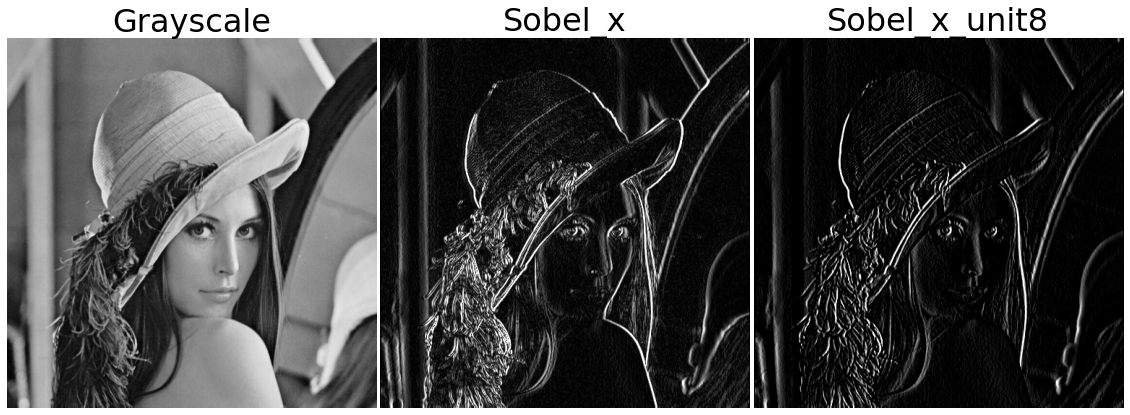

In [2]:
# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)


# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img, -1 , dx=1, dy=0, ksize=3)

# 組合 + 顯示圖片
plt.figure(figsize = (20, 10))
for i, pair in enumerate({'Grayscale': img, 
                          'Sobel_x': img_sobel_x,
                          'Sobel_x_unit8': img_sobel_x_uint8}.items()):
    plt.subplot(1, 3, i+1).imshow(pair[1], cmap = 'gray')
    plt.title(pair[0], fontsize='32')
    plt.axis('off')
plt.subplots_adjust(wspace = .01)
plt.show()

### 比較一次與兩次計算偏微分的結果

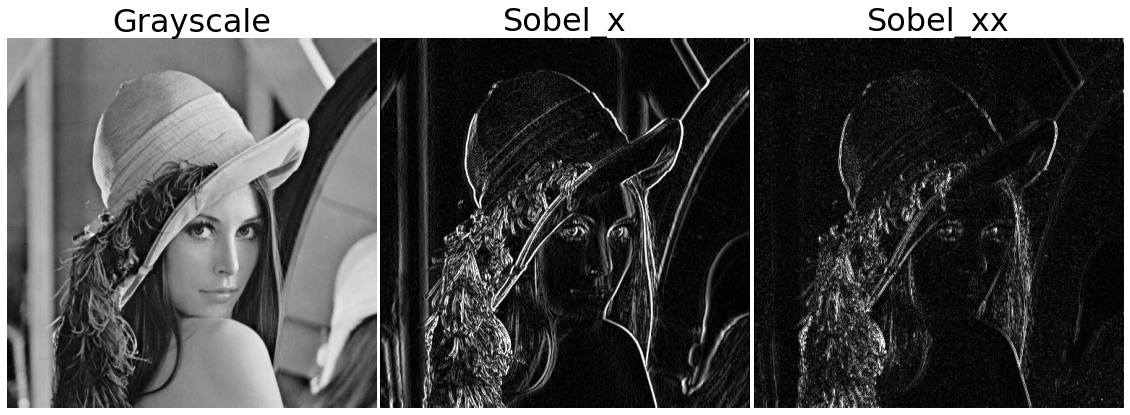

In [3]:
# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.convertScaleAbs(cv2.Sobel(img, cv2.CV_16S, dx=2, dy=0, ksize=3))

# 組合 + 顯示圖片
plt.figure(figsize = (20, 10))
for i, pair in enumerate({'Grayscale': img, 
                          'Sobel_x': img_sobel_x,
                          'Sobel_xx': img_sobel_xx}.items()):
    plt.subplot(1, 3, i+1).imshow(pair[1], cmap = 'gray')
    plt.title(pair[0], fontsize='32')
    plt.axis('off')
plt.subplots_adjust(wspace = .01)
plt.show()